In [1]:
import os
import shutil
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [4]:
train_path="C:\\Users\\KarthikGowda\\Downloads\\images\\seg_train\\seg_train"

In [5]:
os.listdir(train_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [6]:
test_path="C:\\Users\\KarthikGowda\\Downloads\\images\\seg_test\\seg_test"

In [7]:
os.listdir(test_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [9]:
l=os.listdir(train_path+"\\buildings\\")

In [10]:
images=[]
for each in l:
    images.append(imread(train_path+"\\buildings\\"+each))
    

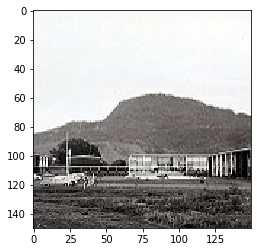

In [12]:
plt.imshow(images[0],cmap="rainbow")

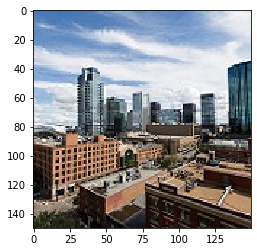

In [13]:
plt.imshow(images[1],cmap="rainbow")

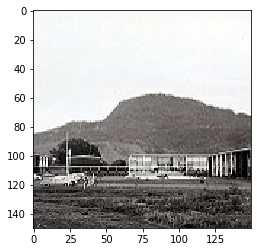

In [14]:
plt.imshow(images[0],cmap="rainbow")

In [15]:
dim1=[]
dim2=[]
dim3=[]


In [17]:
images[0].shape

(150, 150, 3)

In [18]:
for each in images:
    a,b,c=each.shape
    dim1.append(a)
    dim2.append(b)
    dim3.append(c)

In [19]:
np.mean(np.array(dim1))

149.9881332724783

In [20]:
np.mean(np.array(dim2))

150.0

In [21]:
np.mean(np.array(dim3))

3.0

In [22]:
image_shape=(150,150,3)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
images[0].max()

255

In [26]:
images[0].min()

0

In [27]:
image_gen=ImageDataGenerator(rotation_range=20,height_shift_range=0.1,width_shift_range=0.1,rescale=1/255,zoom_range=0.1,shear_range=0.1,horizontal_flip=True,vertical_flip=True,fill_mode="nearest")

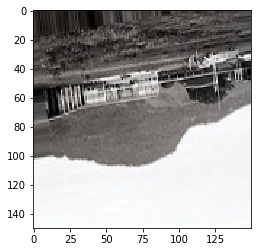

In [28]:
plt.imshow(image_gen.random_transform(images[0]))

In [29]:
image_gen.flow_from_directory(train_path)

Found 14034 images belonging to 6 classes.


In [30]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


In [31]:
train_image_gen=image_gen.flow_from_directory(train_path,shuffle=True,color_mode="rgb",class_mode="categorical",batch_size=64,target_size=(150,150))

Found 14034 images belonging to 6 classes.


In [32]:
test_image_gen=image_gen.flow_from_directory(test_path,shuffle=False,color_mode="rgb",class_mode="categorical",batch_size=64,target_size=(150,150))

Found 3000 images belonging to 6 classes.


In [33]:
test_image_gen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [34]:
test_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [35]:
from tensorflow.keras.models import load_model,Sequential

In [37]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPool2D,Flatten

In [39]:
from tensorflow.keras.optimizers import Adam

In [40]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [42]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),padding="same",strides=(1,1),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),padding="same",strides=(1,1),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),padding="same",strides=(1,1),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 64)      3136      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        32800     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)            

In [44]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",patience=10,verbose=1)

In [45]:
model.fit_generator(train_image_ gen,validation_data=test_image_gen,epochs=500,verbose=1,callbacks=[early_stop])

Epoch 1/500
220/220 [==============================] - 768s 3s/step - loss: 1.2373 - accuracy: 0.4933 - val_loss: 1.1053 - val_accuracy: 0.5787
Epoch 2/500
220/220 [==============================] - 795s 4s/step - loss: 0.9754 - accuracy: 0.6223 - val_loss: 0.8637 - val_accuracy: 0.6710
Epoch 3/500
220/220 [==============================] - 774s 4s/step - loss: 0.8722 - accuracy: 0.6726 - val_loss: 0.9367 - val_accuracy: 0.6600
Epoch 4/500
220/220 [==============================] - 882s 4s/step - loss: 0.7901 - accuracy: 0.7065 - val_loss: 0.7413 - val_accuracy: 0.7313
Epoch 5/500
220/220 [==============================] - 792s 4s/step - loss: 0.7399 - accuracy: 0.7278 - val_loss: 0.6379 - val_accuracy: 0.7600
Epoch 6/500
220/220 [==============================] - 791s 4s/step - loss: 0.7024 - accuracy: 0.7455 - val_loss: 0.7265 - val_accuracy: 0.7323
Epoch 7/500
220/220 [==============================] - 790s 4s/step - loss: 0.6934 - accuracy: 0.7488 - val_loss: 0.6774 - val_accuracy:

In [46]:
loses=pd.DataFrame(model.history.history)

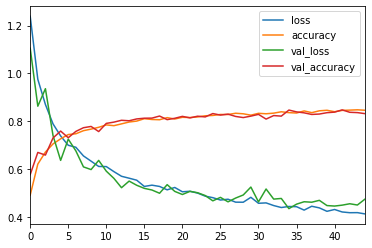

In [47]:
loses.plot.line()

In [48]:
from tensorflow.keras.preprocessing import image

In [66]:
i=image.load_img("C:\\Users\\KarthikGowda\\Downloads\\images\\seg_pred\\seg_pred\\132.jpg",target_size=(150,150,3))

In [67]:
i_array=image.img_to_array(i)

In [68]:
i_array.shape

(150, 150, 3)

In [69]:
i_array=np.expand_dims(i_array,axis=0)

In [70]:
i_array.shape

(1, 150, 150, 3)

In [71]:
model.predict_classes(i_array)

array([0], dtype=int64)

In [72]:
test_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [73]:
pred=model.predict_generator(test_image_gen)

In [74]:
pred

array([[9.87503350e-01, 1.87478721e-09, 8.98984901e-04, 5.55083432e-07,
        1.09714996e-02, 6.25554414e-04],
       [8.71311426e-01, 1.06322505e-05, 1.37534493e-03, 3.14806329e-07,
        3.83732538e-03, 1.23465039e-01],
       [9.90329981e-01, 6.46669940e-11, 1.42234114e-06, 3.99370172e-08,
        5.72267780e-08, 9.66853555e-03],
       ...,
       [2.24038735e-01, 2.33140979e-02, 1.56763401e-02, 6.49553120e-01,
        5.53154163e-02, 3.21022607e-02],
       [6.10486984e-01, 1.17257805e-04, 3.41295227e-02, 5.63266268e-03,
        2.56560706e-02, 3.23977441e-01],
       [2.81729717e-02, 1.83450481e-06, 1.38551577e-05, 3.37434926e-07,
        6.10605366e-06, 9.71804857e-01]], dtype=float32)

In [76]:
tp=pred>0.5

In [77]:
tp

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False,  True]])

In [78]:
test_image_gen.classes

array([0, 0, 0, ..., 5, 5, 5])